In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import os


In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
dataset_path = '/kaggle/input/plantdisease/Plant_leave_diseases_dataset_with_augmentation'
dataset = ImageFolder(root=dataset_path, transform=transform)

In [5]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

In [6]:
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [7]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [8]:
model = resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 25)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [13]:
train_losses = []
train_accuracies = []

In [15]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%")
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)


Epoch [1/10], Loss: 1.0206, Train Accuracy: 70.79%
Epoch [2/10], Loss: 0.5280, Train Accuracy: 84.39%
Epoch [3/10], Loss: 0.3468, Train Accuracy: 89.84%
Epoch [4/10], Loss: 0.2535, Train Accuracy: 92.50%
Epoch [5/10], Loss: 0.1990, Train Accuracy: 94.07%
Epoch [6/10], Loss: 0.1623, Train Accuracy: 95.34%
Epoch [7/10], Loss: 0.1350, Train Accuracy: 96.09%
Epoch [8/10], Loss: 0.1114, Train Accuracy: 96.90%
Epoch [9/10], Loss: 0.0931, Train Accuracy: 97.37%
Epoch [10/10], Loss: 0.0761, Train Accuracy: 97.92%


In [16]:
test_predictions = []
test_labels = []

In [18]:
from sklearn.metrics import accuracy_score
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

KeyboardInterrupt: 

In [20]:
test_accuracy = accuracy_score(test_labels, test_predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.72%


In [22]:
model_path = 'resnet18_trained_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Trained model saved to {model_path}")

Trained model saved to resnet18_trained_model.pth


In [31]:
print(train_losses,
train_accuracies,
test_labels,
test_predictions)

[1.0206090922395472, 0.5280493827602809, 0.34675436421824396, 0.25349413340674065, 0.1990350100808701, 0.16230553289824837, 0.13502372742974683, 0.11140091281329789, 0.09306506005879919, 0.07612945755753114] [70.7869569474818, 84.39468616378888, 89.8390834611744, 92.49600156673303, 94.07252668342201, 95.33896922022392, 96.08969546626628, 96.90243822828606, 97.3659300845383, 97.92407872833502] [9, 13, 21, 12, 5, 7, 12, 17, 5, 13, 15, 12, 16, 18, 12, 12, 8, 13, 3, 9, 2, 12, 12, 11, 11, 6, 21, 22, 16, 5, 15, 4, 1, 18, 15, 21, 17, 6, 21, 15, 12, 12, 12, 23, 13, 3, 16, 23, 13, 10, 13, 14, 1, 14, 12, 13, 21, 20, 24, 17, 12, 18, 4, 17, 8, 8, 2, 12, 19, 18, 11, 11, 17, 12, 12, 20, 8, 21, 21, 23, 21, 15, 3, 19, 2, 13, 22, 10, 21, 3, 17, 8, 14, 15, 0, 3, 20, 21, 2, 21, 11, 21, 12, 23, 12, 12, 21, 6, 9, 8, 19, 23, 21, 23, 7, 21, 17, 23, 5, 7, 15, 21, 13, 21, 6, 6, 24, 17, 3, 12, 21, 2, 21, 12, 16, 23, 21, 23, 3, 1, 24, 24, 12, 12, 22, 12, 12, 10, 1, 10, 6, 24, 1, 20, 13, 13, 21, 21, 10, 12, 21, 2

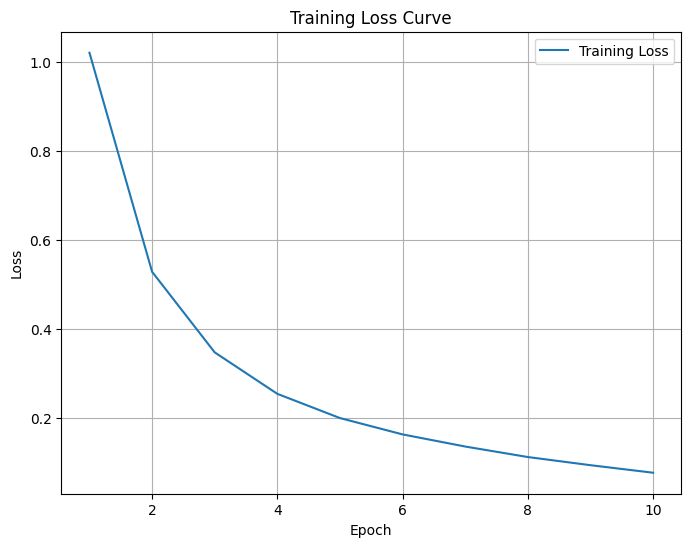

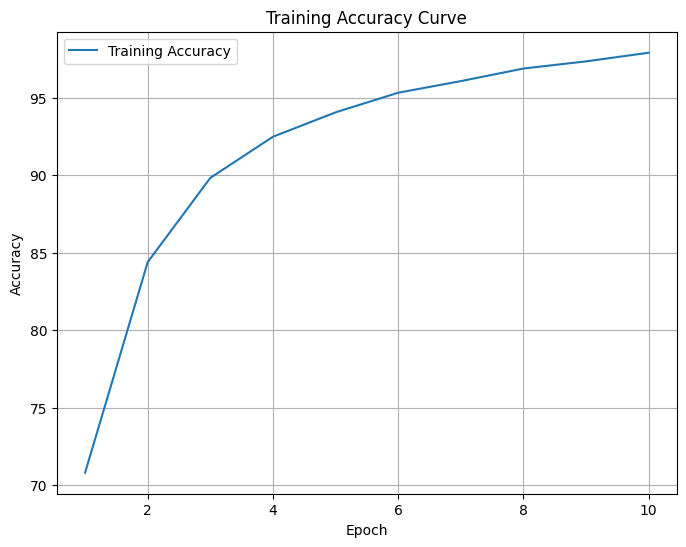

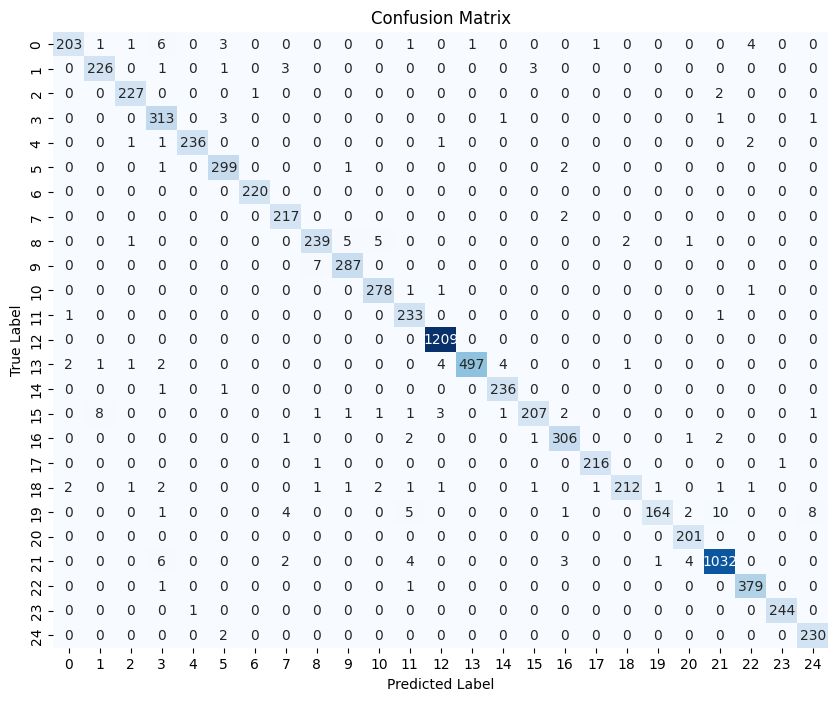

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       221
           1       0.96      0.97      0.96       234
           2       0.98      0.99      0.98       230
           3       0.93      0.98      0.96       319
           4       1.00      0.98      0.99       241
           5       0.97      0.99      0.98       303
           6       1.00      1.00      1.00       220
           7       0.96      0.99      0.97       219
           8       0.96      0.94      0.95       253
           9       0.97      0.98      0.97       294
          10       0.97      0.99      0.98       281
          11       0.94      0.99      0.96       235
          12       0.99      1.00      1.00      1209
          13       1.00      0.97      0.98       512
          14       0.98      0.99      0.98       238
          15       0.98      0.92      0.95       226
          16       0.97      0.98      0.97       313
    

ValueError: multiclass format is not supported

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import numpy as np

# Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(test_labels, test_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# # ROC Curve
# fpr, tpr, _ = roc_curve(test_labels, test_predictions)
# roc_auc = roc_auc_score(test_labels, test_predictions)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(test_labels, test_predictions)
average_precision = average_precision_score(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    # Convert labels to binary for the current class
    binary_test_labels = np.array([1 if label == i else 0 for label in test_labels])
    binary_test_predictions = np.array([1 if pred == i else 0 for pred in test_predictions])
    # Compute ROC curve and AUC
    fpr[i], tpr[i], _ = roc_curve(binary_test_labels, binary_test_predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (Class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'num_classes' is not defined

In [ ]:
from torchvision.models import mobilenet_v2

mobilenet_v2_model = mobilenet_v2(pretrained=False)
num_ftrs = mobilenet_v2_model.classifier[1].in_features
mobilenet_v2_model.classifier[1] = nn.Linear(num_ftrs, 39)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
mobilenet_v2_model = mobilenet_v2_model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mobilenet_v2_model.parameters(), lr=0.001, momentum=0.9)

In [10]:
torch.cuda.is_available()

True

In [ ]:
train_losses_1 = []
train_accuracies_1 = []

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    mobilenet_v2_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = mobilenet_v2_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2f}%")
    train_losses_1.append(epoch_loss)
    train_accuracies_1.append(epoch_accuracy)

In [ ]:
# Testing loop
mobilenet_v2_model.eval()
test_predictions_1 = []
test_labels_1 = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mobilenet_v2_model(images)
        _, predicted = outputs.max(1)
        test_predictions_1.extend(predicted.cpu().numpy())
        test_labels_1.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(test_labels_1, test_predictions_1) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

In [ ]:
torch.save(mobilenet_v2_model.state_dict(),"./mobile_net.pth")

In [ ]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/mobile_net.pth')

In [ ]:
!wget "mobile_net.pth"

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

mobilenet_v2_model = mobilenet_v2(pretrained=False)
num_ftrs = mobilenet_v2_model.classifier[1].in_features
mobilenet_v2_model.classifier[1] = nn.Linear(num_ftrs, 39)  # Assuming you trained with 39 classes
mobilenet_v2_model.load_state_dict(torch.load("/kaggle/working/mobile_net.pth"))
mobilenet_v2_model = mobilenet_v2_model.to(device)
